In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import jax
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from ripplegw.waveforms import NRSurrogate
import time
from jax import vmap
from ripplegw import ms_to_Mc_eta
import scipy

import jax.numpy as jnp
from jaxNRSur.SurrogateModel import NRHybSur3dq8Model

jax.config.update("jax_enable_x64", True)

/opt/homebrew/Caskroom/miniforge/base/envs/ripple/lib/python3.10/site-packages/jaxNRSur/PolyPredictor.py:29: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  def predict(


In [3]:
model = NRHybSur3dq8Model()
NR_model = NRSurrogate.NRSurrogate(2048, 4, model)

Try loading file from cache
Cache found and loading data


In [4]:
hp, hc = NR_model.gen_NRSurrogate_hphc(
    jnp.array([40.0, 0.2, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0])
)
print(NR_model.freqs)

TypeError: Cannot interpret value of type <class 'ripplegw.waveforms.NRSurrogate.NRSurrogate'> as an abstract array; it does not have a dtype attribute

/opt/homebrew/Caskroom/miniforge/base/envs/ripple/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


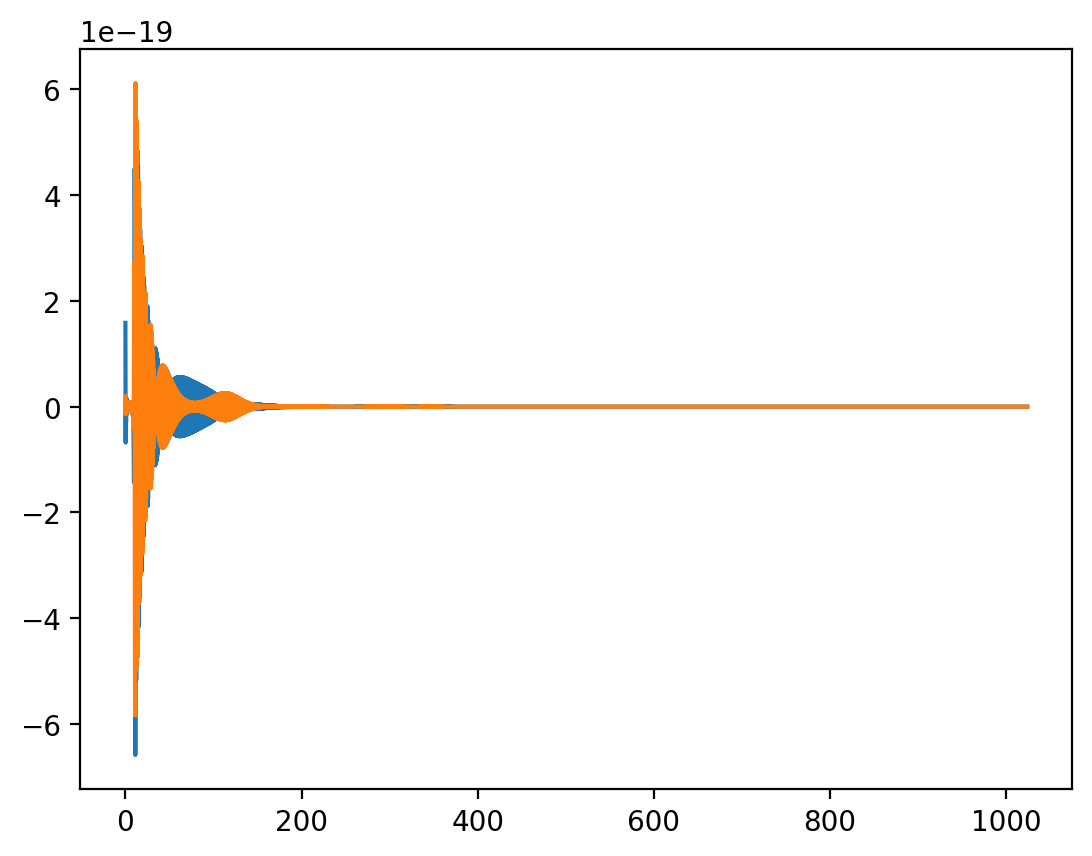

In [ ]:
plt.plot(NR_model.freqs, hp)
plt.plot(NR_model.freqs, hc)
plt.show()

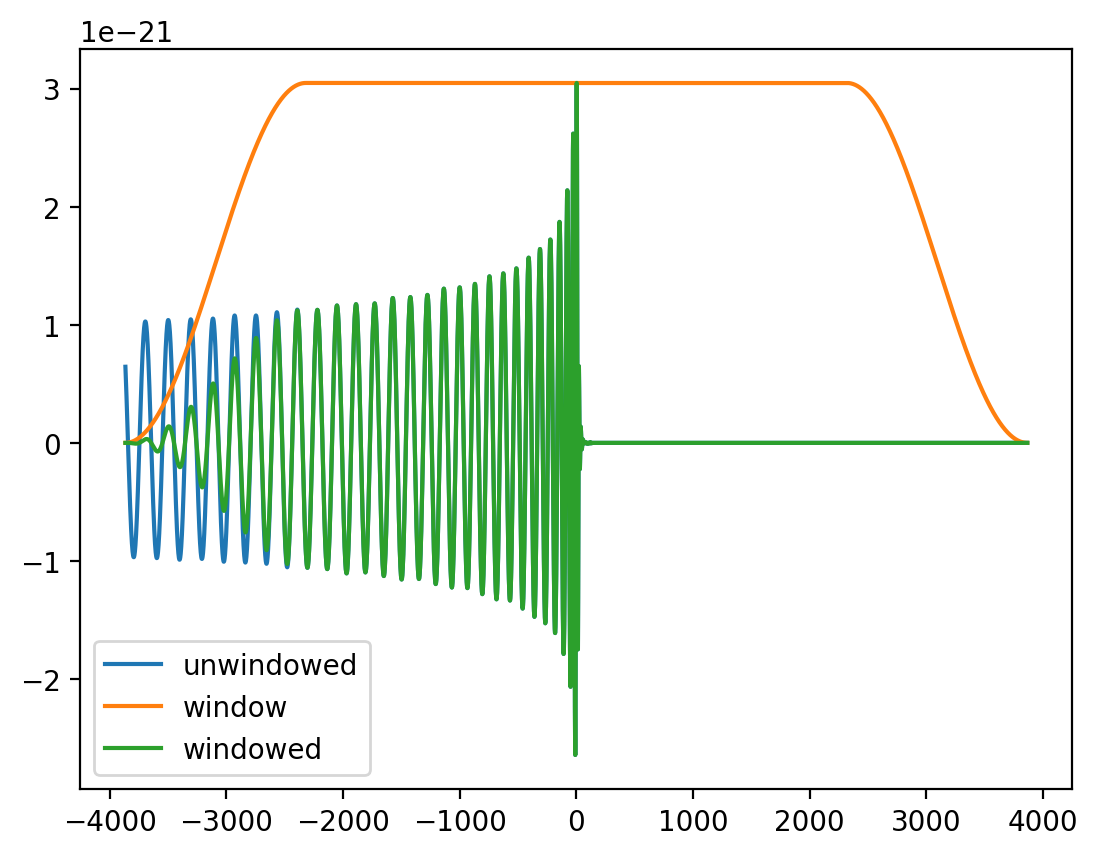

In [ ]:
h, time_M = NR_model.gen_NRSurrogate_td(
    jnp.array([40.0, 0.2, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0])
)
plt.plot(time_M, h, label="unwindowed")
plt.plot(time_M, NR_model.window * h.max(), label="window")
plt.plot(time_M, NR_model.window * h, label="windowed")
plt.legend()
plt.show()

In [ ]:
%%timeit
hp, hc = NR_model.gen_NRSurrogate_hphc(
    jnp.array([40.0, 0.2, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0])
)

226 ms ± 5.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
